In [108]:
import pandas as pd
import numpy as np
import seaborn as sns

In [109]:
df = pd.read_csv('output.csv')
# print(df.shape)
# df = df[~df.isin(['NaN']).any(axis=1) & ~df.isna().any(axis=1)]
# print(df.shape)

In [110]:
# Convert 'graderingsdatum' to datetime
df['graderingsdatum'] = pd.to_datetime(df['graderingsdatum'])

# Extract the year and find unique years
unique_years = df['graderingsdatum'].dt.year.unique()

# Count the number of unique years
num_unique_years = len(unique_years)

print("Unique years in the dataset:", unique_years)
print("Number of unique years:", num_unique_years)


Unique years in the dataset: [2020 2021 2022 2023]
Number of unique years: 4


In [111]:
df['year'] = df['graderingsdatum'].dt.year
df = df.drop(columns=['geometry', 'graderingsdatum', 'skadegorare', 'groda', 'sort'])
df = df.interpolate()
df['varde'] = df['varde'] * (df['utvecklingsstadium'] / 100.0)

lag_col_count = 3
for lag in range(1, lag_col_count+1): 
    lag_column_name = f'varde_lag_{lag}'
    df[lag_column_name] = df['varde'].shift(lag)
    df[lag_column_name].fillna(df['varde'].iloc[0], inplace=True)

df.head(10)

C:\Users\Mahmu\AppData\Local\Temp\ipykernel_21688\3744987629.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[lag_column_name].fillna(df['varde'].iloc[0], inplace=True)
C:\Users\Mahmu\AppData\Local\Temp\ipykernel_21688\3744987629.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a

,varde,utvecklingsstadium,sensitivity,Lufttemperatur_mean,Nederbördsmängd_sum,year,varde_lag_1,varde_lag_2,varde_lag_3
0,0.0000,30.000000,4.0,6.171429,0.0,2020,0.0000,0.0000,0.0000
1,0.0000,30.500000,4.0,6.857143,0.0,2020,0.0000,0.0000,0.0000
2,0.0000,30.000000,4.0,7.128571,0.0,2020,0.0000,0.0000,0.0000
3,0.0000,31.000000,7.0,7.128571,0.0,2020,0.0000,0.0000,0.0000
4,0.0000,30.000000,6.5,7.128571,0.0,2020,0.0000,0.0000,0.0000
5,0.7675,25.583333,6.0,8.114286,0.0,2020,0.0000,0.0000,0.0000
6,0.0000,30.000000,7.0,7.128571,0.0,2020,0.7675,0.0000,0.0000
7,0.0000,30.000000,6.0,7.128571,0.0,2020,0.0000,0.7675,0.0000
8,0.0000,23.000000,5.0,7.128571,0.0,2020,0.0000,0.0000,0.7675
9,0.0000,30.000000,4.0,7.842857,0.0,2020,0.0000,0.0000,0.0000


C:\Users\Mahmu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


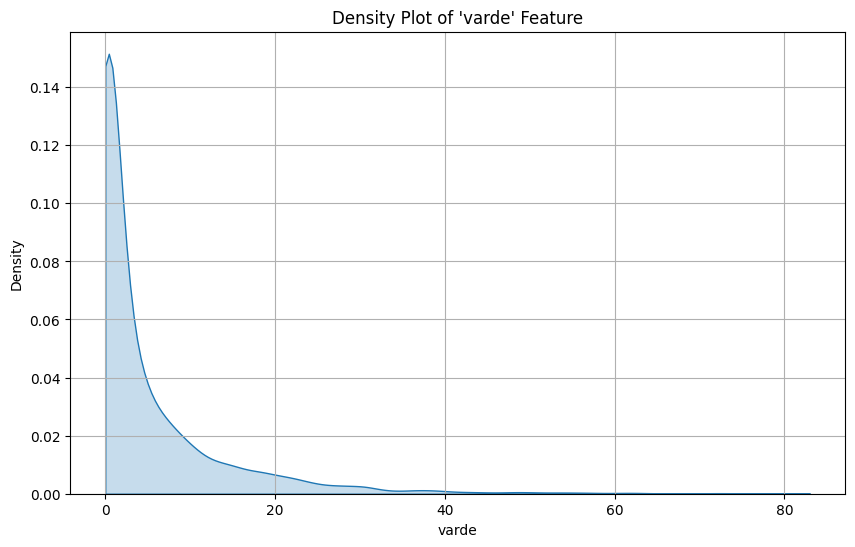

In [112]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['varde'], fill=True, clip=(df['varde'].min(), df['varde'].max()))
plt.title('Density Plot of \'varde\' Feature')
plt.xlabel('varde')
plt.ylabel('Density')
plt.grid()
plt.show()

In [113]:
# Create training data (years 2020, 2021, 2022)
train_data = df[df['year'].isin([2020, 2021, 2022])]

# Create test data (year 2023)
test_data = df[df['year'] == 2023]

# Display the shapes of the resulting DataFrames
print("Training data shape:", train_data.shape)
print("Test data shape:", test_data.shape)


Training data shape: (7548, 9)
Test data shape: (2251, 9)


In [114]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'target_variable' is the name of your target column
# Replace 'target_variable' with the actual name of your target column
target_variable = 'varde'  # Example target variable

# Separate features and target variable for training data
X_train = train_data.drop(columns=[target_variable])
y_train = train_data[target_variable]

# Initialize the Random Forest Regressor
model = RandomForestRegressor()

# Train the model
model.fit(X_train, y_train)

# Prepare the test data
X_test = test_data.drop(columns=[target_variable])
y_test = test_data[target_variable]

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)

print("R^2 Score on test data:", r2)

R^2 Score on test data: -0.5290852795730681


# CHECK HOW MANY LAG COLUMNS ARE BENEFICIAL

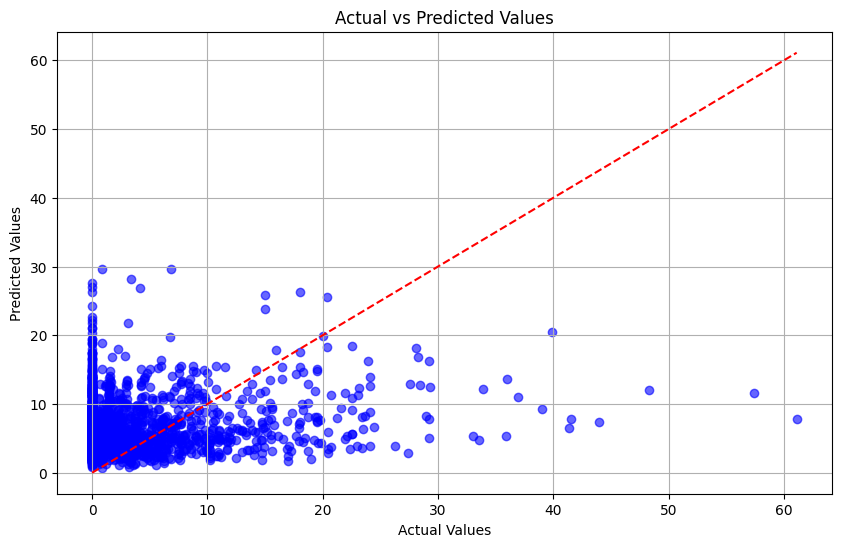

In [115]:
import matplotlib.pyplot as plt

# Plotting y_test vs y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Line for perfect predictions
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid()
plt.show()


Lags: 1, R^2: -0.30532
Lags: 2, R^2: -0.25717
Lags: 3, R^2: -0.20946
Lags: 4, R^2: -0.19193
Lags: 5, R^2: -0.15963
Lags: 6, R^2: -0.14258
Lags: 7, R^2: -0.13189
Lags: 8, R^2: -0.10504
Lags: 9, R^2: -0.09242
Lags: 10, R^2: -0.08371
Lags: 11, R^2: -0.07309
Lags: 12, R^2: -0.06916
Lags: 13, R^2: -0.06653
Lags: 14, R^2: -0.06071
Lags: 15, R^2: -0.05587
Lags: 16, R^2: -0.05277
Lags: 17, R^2: -0.05060
Lags: 18, R^2: -0.04991
Lags: 19, R^2: -0.05134
Stopping at 19 lags. Best lags: 18, Best R^2: -0.04991


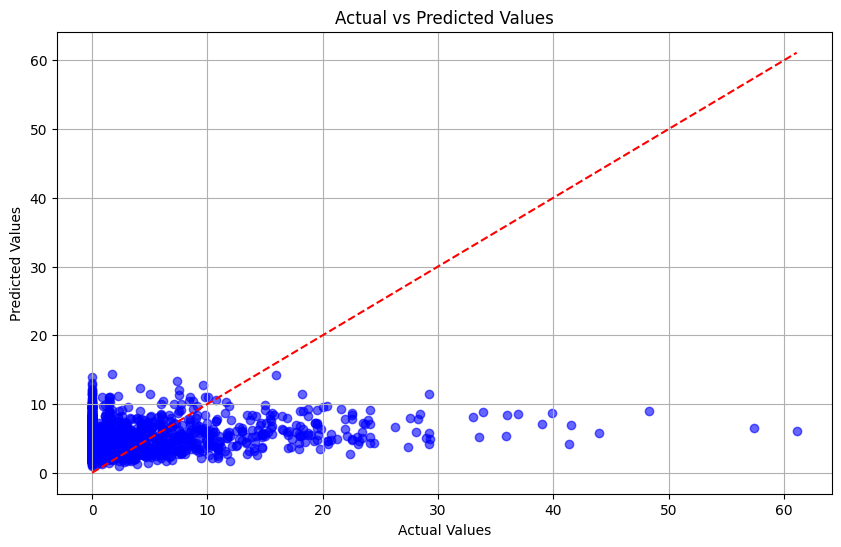

In [116]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Load and preprocess dataset
df = pd.read_csv('output.csv')
df['graderingsdatum'] = pd.to_datetime(df['graderingsdatum'])
df['year'] = df['graderingsdatum'].dt.year
df = df.drop(columns=['geometry', 'graderingsdatum', 'skadegorare', 'groda', 'sort'])
df = df.interpolate()
df['varde'] = df['varde'] * (df['utvecklingsstadium'] / 100.0)

target_column = 'varde'  # Adjusted based on provided processing
max_lags = 50  # Maximum lag to consider

# Prepare the dataset with initial features
def create_lagged_features(data, target, num_lags):
    df_lagged = data.copy()
    for lag in range(1, num_lags + 1):
        df_lagged[f'lag_{lag}'] = df_lagged[target].shift(lag)
    return df_lagged.dropna()

# Split into train and test sets
def train_test_lagged(df, target_column, max_lags):
    X, y = df.drop(columns=[target_column]), df[target_column]
    return train_test_split(X, y, test_size=0.2, shuffle=False)

best_r2 = -np.inf
prev_r2 = -np.inf
best_lags = 0

for num_lags in range(1, max_lags + 1):
    df_lagged = create_lagged_features(df, target_column, num_lags)
    X_train, X_test, y_train, y_test = train_test_lagged(df_lagged, target_column, num_lags)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    print(f'Lags: {num_lags}, R^2: {r2:.5f}')
    
    if r2 > best_r2:
        best_r2 = r2
        best_lags = num_lags
    else:
        print(f'Stopping at {num_lags} lags. Best lags: {best_lags}, Best R^2: {best_r2:.5f}')
        break

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Line for perfect predictions
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid()
plt.show()

# Test different Models

Linear Regression, Lags: 1, R^2: -0.30532
Polynomial Regression, Lags: 1, R^2: -0.18142
Ridge Regression, Lags: 1, R^2: -0.30528
Random Forest, Lags: 1, R^2: -0.61885
XGBoost, Lags: 1, R^2: -0.51066
SVR, Lags: 1, R^2: -0.05498
Generalized Additive Model, Lags: 1, R^2: -0.06756
Linear Regression, Lags: 2, R^2: -0.25717
Polynomial Regression, Lags: 2, R^2: -0.18972
Ridge Regression, Lags: 2, R^2: -0.25714
Random Forest, Lags: 2, R^2: -0.57803
XGBoost, Lags: 2, R^2: -0.57368
SVR, Lags: 2, R^2: -0.05525
Generalized Additive Model, Lags: 2, R^2: -0.06422
Linear Regression, Lags: 3, R^2: -0.20946
Polynomial Regression, Lags: 3, R^2: -0.22092
Ridge Regression, Lags: 3, R^2: -0.20943
Random Forest, Lags: 3, R^2: -0.51622
XGBoost, Lags: 3, R^2: -0.48767
SVR, Lags: 3, R^2: -0.05576
Generalized Additive Model, Lags: 3, R^2: -0.05787
Linear Regression, Lags: 4, R^2: -0.19193
Polynomial Regression, Lags: 4, R^2: -0.24367
Ridge Regression, Lags: 4, R^2: -0.19190
Random Forest, Lags: 4, R^2: -0.51422

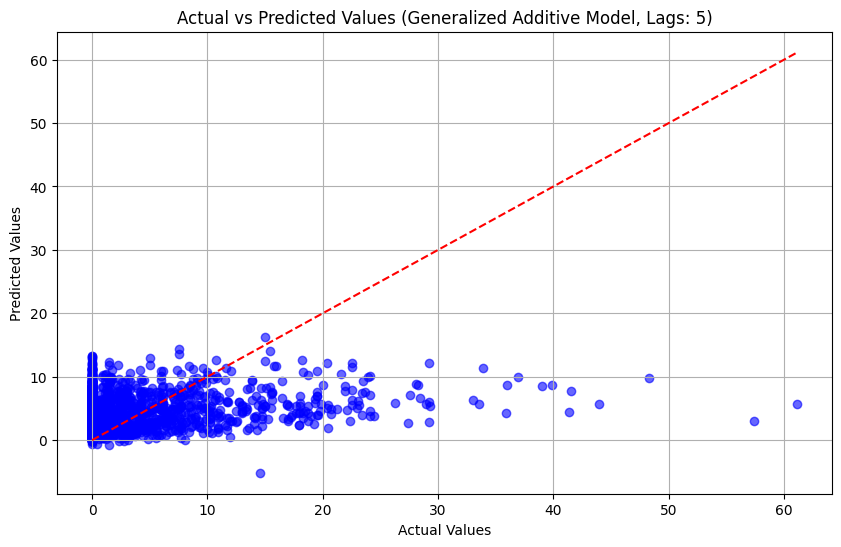

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import xgboost as xgb
from pygam import LinearGAM

# Load and preprocess dataset
df = pd.read_csv('output.csv')
df['graderingsdatum'] = pd.to_datetime(df['graderingsdatum'])
df['year'] = df['graderingsdatum'].dt.year
df = df.drop(columns=['geometry', 'graderingsdatum', 'skadegorare', 'groda', 'sort'])
df = df.interpolate()
df['varde'] = df['varde'] * (df['utvecklingsstadium'] / 100.0)

target_column = 'varde'
max_lags = 5

# Prepare the dataset with lagged features
def create_lagged_features(data, target, num_lags):
    df_lagged = data.copy()
    for lag in range(1, num_lags + 1):
        df_lagged[f'lag_{lag}'] = df_lagged[target].shift(lag)
    return df_lagged.dropna()

# Split into train and test sets
def train_test_lagged(df, target_column):
    X, y = df.drop(columns=[target_column]), df[target_column]
    return train_test_split(X, y, test_size=0.2, shuffle=False)

# Determine optimal lag count for each model
optimal_lags = {}
for num_lags in range(1, max_lags + 1):
    df_lagged = create_lagged_features(df, target_column, num_lags)
    X_train, X_test, y_train, y_test = train_test_lagged(df_lagged, target_column)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    if len(optimal_lags) == 0 or r2 > max(optimal_lags.values()):
        optimal_lags[num_lags] = r2
    else:
        break

# Evaluate models with optimal lags
results = {}
for num_lags, _ in optimal_lags.items():
    df_lagged = create_lagged_features(df, target_column, num_lags)
    X_train, X_test, y_train, y_test = train_test_lagged(df_lagged, target_column)
    
    models = {
        "Linear Regression": LinearRegression(),
        "Polynomial Regression": make_pipeline(PolynomialFeatures(3), LinearRegression()),
        "Ridge Regression": Ridge(),
        "Random Forest": RandomForestRegressor(n_estimators=100),
        "XGBoost": xgb.XGBRegressor(objective="reg:squarederror"),
        "SVR": SVR(kernel='rbf'),
        "Generalized Additive Model": LinearGAM()
    }
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        r2 = r2_score(y_test, y_pred)
        results[(name, num_lags)] = r2
        print(f'{name}, Lags: {num_lags}, R^2: {r2:.5f}')

# Get best model
best_model, best_lags = max(results, key=results.get)
best_r2 = results[(best_model, best_lags)]

# Plot actual vs predicted values for best model
df_lagged = create_lagged_features(df, target_column, best_lags)
X_train, X_test, y_train, y_test = train_test_lagged(df_lagged, target_column)
best_model_instance = models[best_model]

best_model_instance.fit(X_train, y_train)
y_pred = best_model_instance.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title(f'Actual vs Predicted Values ({best_model}, Lags: {best_lags})')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid()
plt.show()


In [121]:
best_model, best_lags = max(results, key=results.get)
best_r2 = results[(best_model, best_lags)]


In [123]:
print(best_model, best_r2)

Generalized Additive Model -0.032545539643360044
